In [206]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sei3h2rdxt import build_model

In [340]:
N = 1000
N_I = 10
cm = build_model(N=N,
                 beta=5.0,
                 avgn=20,
                 theta0=0.0,
                 thetaI=0.1,
                 etaCT=0.3)

In [341]:
y0=np.zeros(len(cm.states))
y0[0] = N-N_I
y0[1] = N_I

t = np.linspace(0, 90, 1000)

traj = cm.integrate(t, y0)

In [342]:
# Statistics:

print('Final deaths: {0:.3f}%'.format(traj['y'][-1,-1]*100/N))
print('Peak ICU use: {0:.3f}%'.format(np.amax(traj['y'][:,-2])*100/N))
print('Peak hospitalization: {0:.3f}%'.format(np.amax(traj['y'][:,-3])*100/N))
print('Peak isolated: {0:.3f}%'.format(np.amax(np.sum(traj['y'][:,6:12], axis=1))*100/N))

Final deaths: 0.580%
Peak ICU use: 0.720%
Peak hospitalization: 2.114%
Peak isolated: 19.931%


<IPython.core.display.Javascript object>


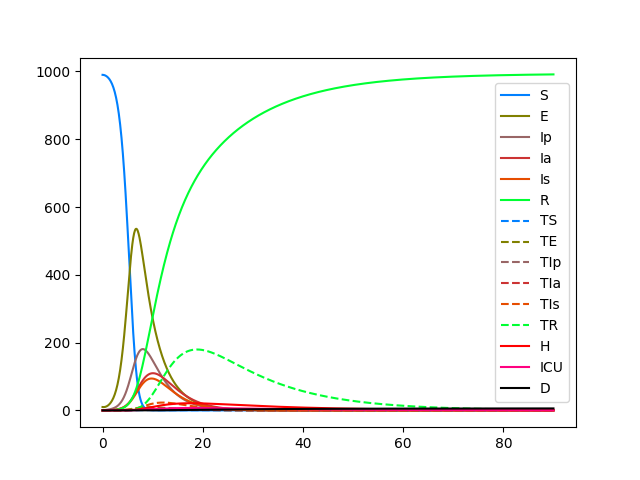

In [343]:
fig, ax = plt.subplots()

cmap = {
    'S': (0, 0.5, 1.0),
    'E': (0.5, 0.5, 0.0),
    'Ip': (0.6, 0.4, 0.4),
    'Ia': (0.8, 0.2, 0.2),
    'Is': (0.9, 0.3, 0),
    'R': (0, 1.0, 0.2),
    'H': (1.0, 0, 0),
    'ICU': (1.0, 0, 0.5),
    'D': (0, 0, 0)
}

for i, s in enumerate(cm.states):
    if s[0] == 'T':
        c = cmap[s[1:]]
        dt = '--'
    else:
        c = cmap[s]
        dt = '-'
    ax.plot(t, traj['y'][:,i], label=s, c=c, ls=dt)
    
ax.legend()

In [347]:
tIrng = np.linspace(0, 1)
eCTrng = np.linspace(0, 1)

deaths = []

for tI in tIrng:
    deaths.append([])
    for eCT in eCTrng:
        cm = build_model(N=N,
                         avgn=20,
                 thetaI=tI,
                 etaCT=eCT)
        y0=np.zeros(len(cm.states))
        y0[0] = N-N_I
        y0[1] = N_I
        traj = cm.integrate(t, y0)
        
        deaths[-1].append(traj['y'][-1,-1]/N)

deaths = np.array(deaths)

<IPython.core.display.Javascript object>


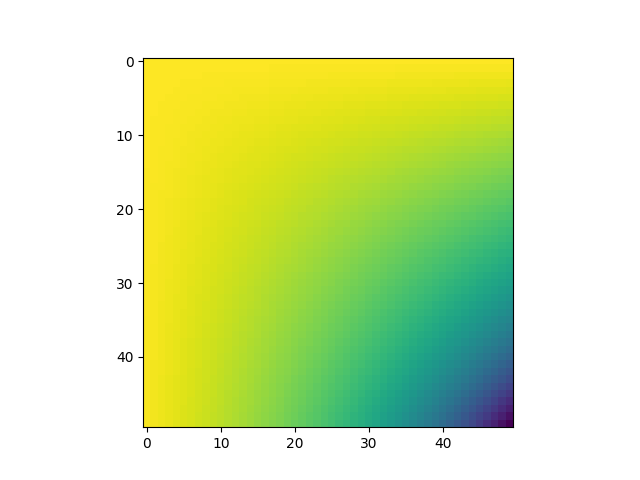

In [348]:
fig, ax = plt.subplots()

ax.imshow(deaths)